# 03.00 Plotting Basics

Making numerical data and showing the matrices containing it
is a good way to see what one is doing with a few numbers.
But once we have hundreds or thousands of values,
looking through lengthly matrices is cumbersome.
Instead, graphical computer displays allow us to
draw complex images to visualize our numbers and data.

![Plot by Hand](plt-table.svg)

<div style="text-align:right;"><sup>plt-table.svg</sup></div>

`matplotlib` is a visualization library from the `SciPy`
(or the broader `PyData` if one prefers that name) group of packages.
It s original purpose was to make visualizations for `NumPy`
in a similar fashion that can be performed in MATLAB.

Based on the MATLAB style `matplotlib` has a good deal of historical baggage.
For example, its plot styling still uses [gnuplot][]'s colors and markers.
Since version 2.x `matplotlib` adopted modern styling defaults,
disengaging from MATLAB's old colors.
Yet, most software (code) today will still be using `matplotlib` version 1.x
where the default apperance of plots was less than appealing.

[gnuplot]: http://www.gnuplot.info/ "ggplot"

Many libraries wrap around `matplotlib` to provide a better interface,
with varied degrees of success at it.
This is because `matplotlib` itself can often be quite clunky
to work with.
That said, in order to fully customize graphs one need
a good knowledge of the internals of the graphics engine used.
And the graphics engines behind `matplotlib` form the majority
of plot making libraries in Python.

## The import

The interface to `matplotlib`'s plotting features is grouped together in the `pyplot` package,
and the naming convention most used is to call this package `plt` in your program. 

In [1]:
import matplotlib.pyplot as plt

### Plotting Backend

Plots are images, and images can be generated in hundreds of ways.
`matplotlib` supports several engines, which is calls *backends*,
e.g. `matplotlib.use('PS')` would use the postscript backend to generate postscript graphics.
The two most useful plot displays are: showing a plot as we write and test our code,
and saving a plot to an image on disk for later use.

The `%matplotlib` magic in `IPython` takes care of the first case.
It is a wrapper of sensible backend defaults.
Without an argument `%matplotlib` generates an interactive backend for scripts.
Yet, for `jupyter` notebooks two options are provided.

- `%matplotlib inline` embeds images into the notebook
- `%matplotlib notebook` constructs an interactive display in JavaScript

Most of the time one will be using `%matplotlib inline` since it is faster
and easily maps to images that one can use later.
The backend produces PNG images which are displayed as `data:` URLs.

In [2]:
%matplotlib inline

In modern jupyter notebook and in jupyter lab tis magic is not needed anymore.
Or more exactly, this magic is executed by default in every notebook.
Yet, if you someday end up working with an early version of jupyter,
you may need the magic to be invoked (evoked) explicitly.

Let's try plotting a simple function, in this case the exponential of $x$: $e^x$.
We first generate a figure with `plt.figure` and only then plot.
We will come back to the `figsize=` argument soon,
for now just know that it controls the size of the full figure
below the code cell.

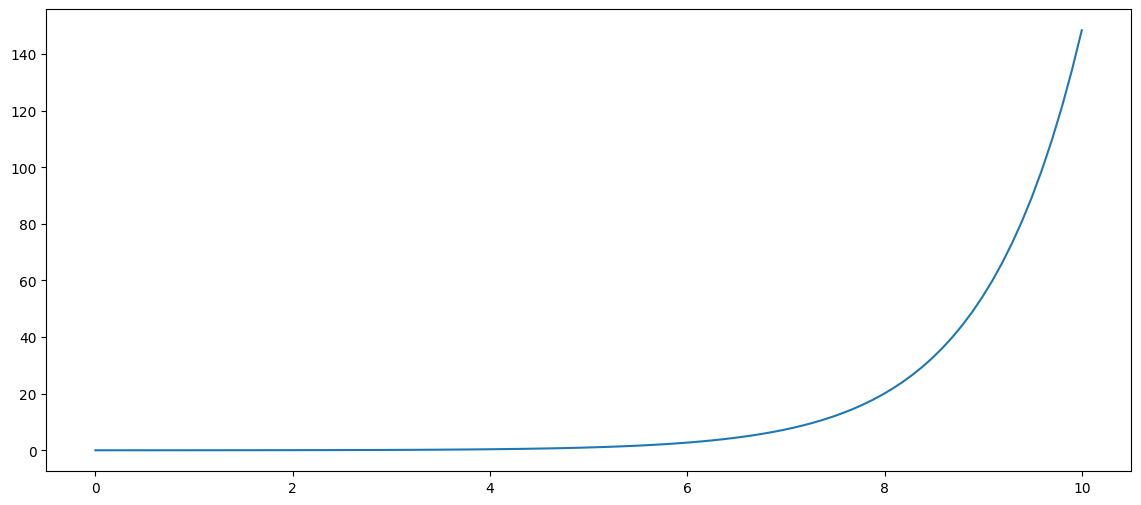

In [3]:
import numpy as np
x = np.linspace(0, 10, 100)
y = np.exp(x - 5)
fig = plt.figure(figsize=(14, 6))
plt.plot(x, y);

Note: the semicolon at the end of the previous cell prevents the output from being printed.
i.e. it adds an empty Python line of code at the end,
and the return of `plt.plot` is not displayed.

### The Engine

If we prevented the output of the previous cell how is the graph displayed?
The `%matplotlib` magic and the backend behind it build the figure(s) generated in the cell
during the cell processing, and *after* the cell finishes the figure(s) are displayed.
This also means tow extra things:

- You can add extra output in a cell apart from the figure
- You can edit and already created figure as long as the cell did not finish

## MATLAB Interface

One way to control `matplotlib`'s plots is with a MATLAB-style interface.
To generate several plots we use `plt.subplot`,
which can be called only once per figure and has a signature.

```python
plt.subplot(rows, columns, current_plot, ...)
```

Akin of MATLAB, if each argument is a single digit only,
then they can be combined into a single arguments.
i.e. `plt.subplot(2, 2, 1)` is equivalent to `plt.subplot(221)`.
Yes, that's horribly confusing.

The final argument indicates the plot on which the following commands will execute.
`matplotlib` stores the state of plot selection internally.

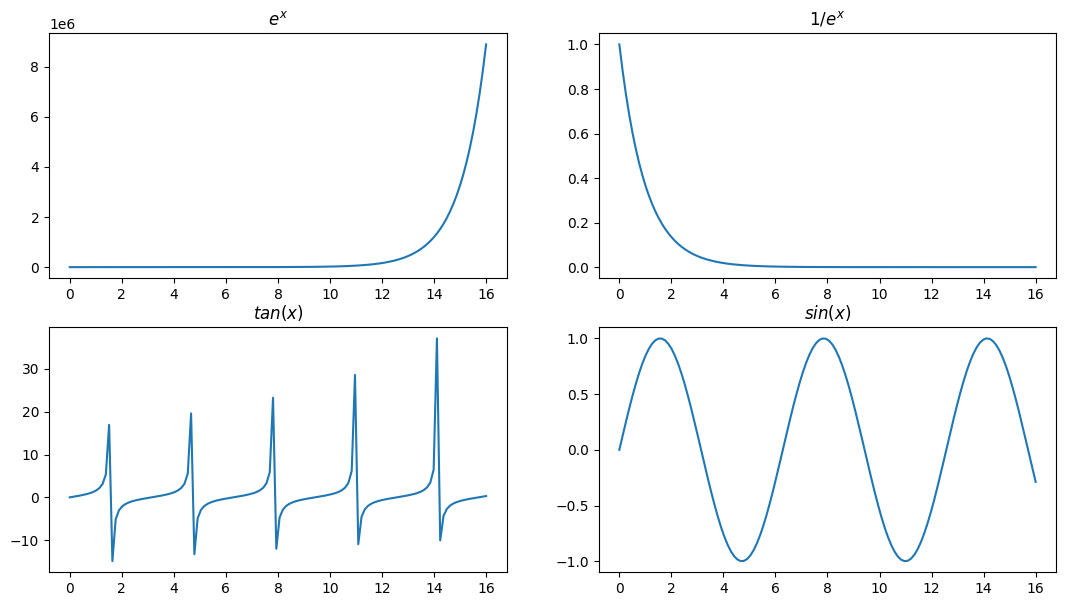

In [4]:
x = np.linspace(0, 16, 128)
plt.figure(figsize=(13, 7))

plt.subplot(221)
plt.plot(x, np.exp(x))
plt.title('$e^x$')

plt.subplot(222)
plt.plot(x, 1/np.exp(x))
plt.title('$1/e^x$')

plt.subplot(2, 2, 3)
plt.plot(x, np.tan(x))
plt.title('$tan(x)$')

plt.subplot(224)
plt.plot(x, np.sin(x))
plt.title('$sin(x)$');

This is pretty old and hard to use.
One can get the current figure (`plt.gcf`) and current axes/plot (`plt.gca`).
All of this was a good way to migrate from MATLAB to Python,
and one will still find lots of code written with this interface,
but this is not very Pythonic.

## Pythonic Interface

`plt.subplots` (note the **s**, not a great name choice) generates and returns handles to subplots.
The handles are organized in a matrix the same way as rows and columns are provided in the signature:

```python
fig, axes = plt.subplots(rows, columns, ...)
```

Therefore `axes[:, 1]` is the 2nd column of axes/plots in the figure.
If one does not particularly care about the plot order there is also `axes.flat`,
which holds all axes references in a single dimension array.
Let's replicate the previous figure with this interface.

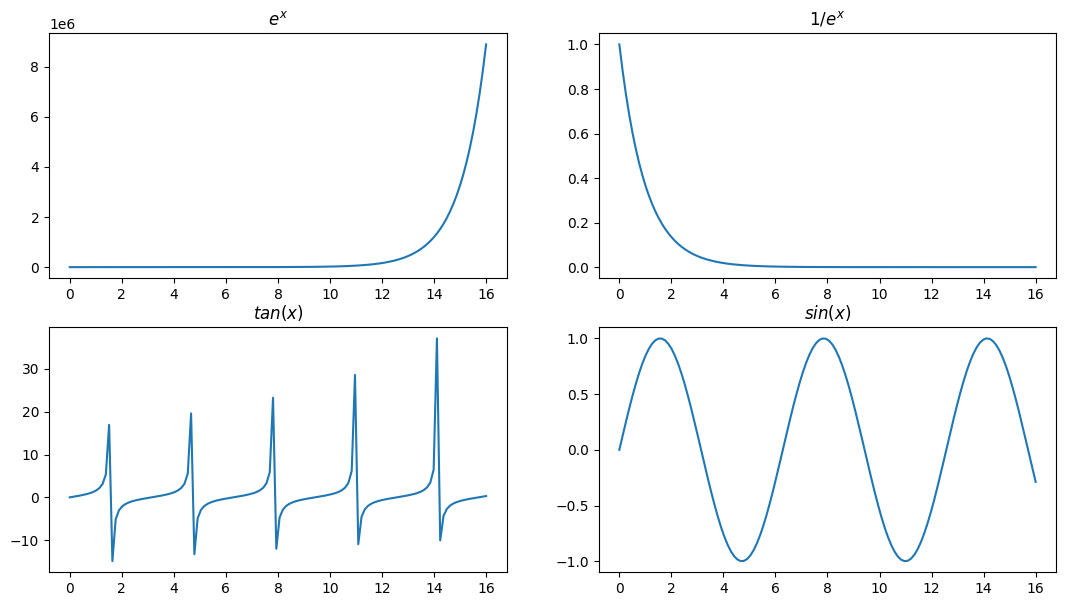

In [5]:
x = np.linspace(0, 16, 128)
fig, axi = plt.subplots(2, 2, figsize=(13, 7))

axi[0, 0].plot(x, np.exp(x))
axi[0, 0].set_title('$e^x$')

axi[0, 1].plot(x, 1/np.exp(x))
axi[0, 1].set_title('$1/e^x$')

axi[1, 0].plot(x, np.tan(x))
axi[1, 0].set_title('$tan(x)$')

axi.flat[3].plot(x, np.sin(x))
axi.flat[3].set_title('$sin(x)$');

You may have noticed that *axes* and *plots* are the same thing for `matplotlib`,
*axes* is how `matplotlib` calls plots moreover since axes can contain other axes.
This is to not be confused with `NumPy`'s *axis*,
especially since *axis* is the singular of *axes*.

Another thing to notice is that the MATLAB interface is 1-based,
whilst the Pythonic interface is 0-based for indexing plots.
In the Pythonic interface most `plt` commands need to be executed on the axis
(e.g. `plt.plot` vs `ax.plot`).
The same functions are on `plt` in the MATLAB interface and on the axis
in the Pythonic interface but there are exceptions (e.g. `plt.title` vs `ax.set_title`).
Most (although not all) of these discrepancies simply add `set_` to the beginning of the functions.

Despite discrepancies the Pythonic interface is much easier to use when one is working
with dozens of axes or several figures at once.